   # Assignment 3
   Question No 3 Using the Jupyter Notebook from class, open each of the les and provide a snapshot of the
   code used to open the image attributes 
    And 
    Question No 1 Provide a snapshot of your 06DICOMExample Notebook where the image is larger than the one
obtained from the example in class
   
   
   

In [4]:
%config IPCompleter.greedy=True
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom

# we define an function as we call it twice to optimize the code
def ImageAttributes(FileName):
    print 'Name Of the File' + FileName
    FirstFile = dicom.read_file(FileName)
    
    #Image Attributes .Some attributes are not present in the file so if else condition is used 
    if FileName == 'im140.dcm':
        Institution_Name = FirstFile.InstitutionName
    else:
        Institution_Name = 'This File does not have an image attribute as institution name'
    AccessionNumber = FirstFile.AccessionNumber
    Columns = FirstFile.Columns
    Rows = FirstFile.Rows
    Vendor =FirstFile.Manufacturer
    VendorName = FirstFile.ManufacturerModelName
    Modality = FirstFile.Modality
    PatientsName = FirstFile.PatientName
    BitsEncoding = FirstFile.BitsAllocated
    BitsStored = FirstFile.BitsStored
    Bitss=FirstFile.HighBit
    if FileName == 'IM_0028.dcm':
        #Pixel related to image
        RescaleSpacing = FirstFile.RescaleIntercept
        RescaleRepresentation = FirstFile.RescaleSlope
        RescaleData = FirstFile.RescaleType
    else:
        RescaleSpacing = ''
        RescaleRepresentation = ''
        RescaleData = ''
    print (' Vendor :' + Vendor + ' and Vendor Name : ' + VendorName + ' \n Modality :' + Modality + '\n Patient Name :'
            + PatientsName + ' \n BitEncoding: ' + str(BitsEncoding) + ' and Bits:' + str(BitsStored) + 
           ' and High Bits:' + str(Bitss))
    print ('The scalability of the image attributes can be defined as ' + 'RescaleSpacing: '+  str(RescaleSpacing) + 
            '\n RescaleRepresentation:' + str(RescaleRepresentation) + ' \n RescaleData:' + str(RescaleData) )
   
    ConstPixelDims = (int(Rows), int(Columns))
    ArrayDicom = np.zeros(ConstPixelDims, dtype=FirstFile.pixel_array.dtype)
    ArrayDicom[:,:]=FirstFile.pixel_array

    #Changed the image size to 15,15 
    fig=plt.figure(figsize=(15, 15), dpi= 100, facecolor='g', edgecolor='k')
    plt.axes().set_aspect('equal') #this makes the image square
    plt.set_cmap(plt.gray()) #grayscale
    x=np.arange(Rows)
    y=np.arange(Columns)

    plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :]))
    plt.axis([x.min(),x.max(),y.min(),y.max()])

Name Of the Fileim140.dcm
 Vendor :GE MEDICAL SYSTEMS and Vendor Name : LightSpeed VCT 
 Modality :CT
 Patient Name : 
 BitEncoding: 16 and Bits:16 and High Bits:15
The scalability of the image attributes can be defined as RescaleSpacing: 
 RescaleRepresentation: 
 RescaleData:
-----------------------------------------Second File ------------------------------
Name Of the FileIM_0028.dcm
 Vendor :Philips Medical Systems and Vendor Name : Achieva 
 Modality :MR
 Patient Name : 
 BitEncoding: 16 and Bits:12 and High Bits:11
The scalability of the image attributes can be defined as RescaleSpacing: 0
 RescaleRepresentation:2.12918192918192 
 RescaleData:normalized


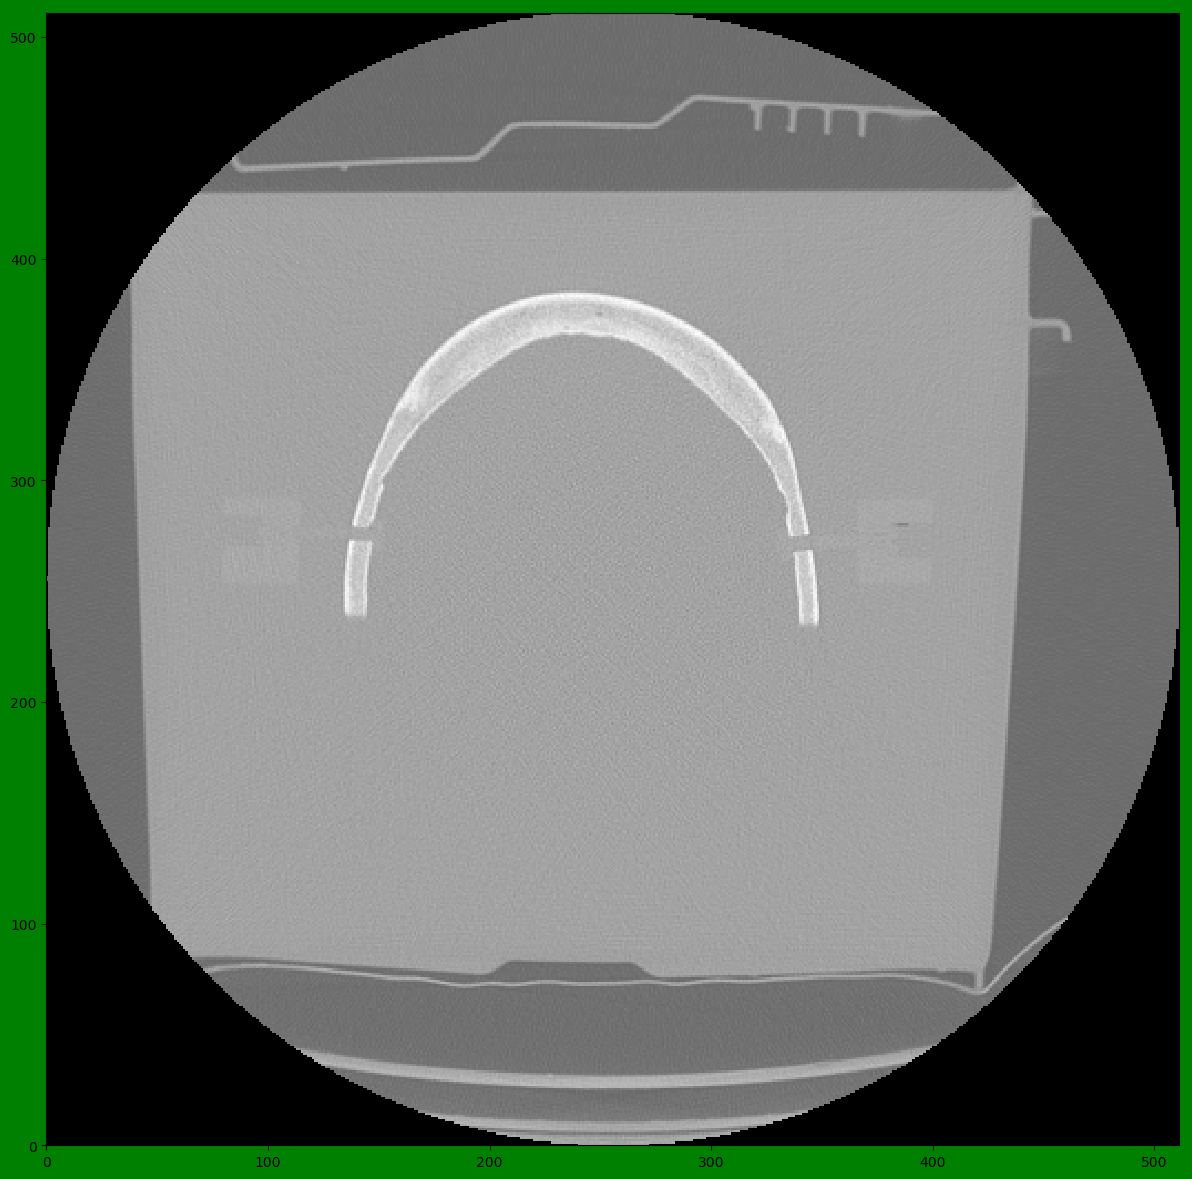

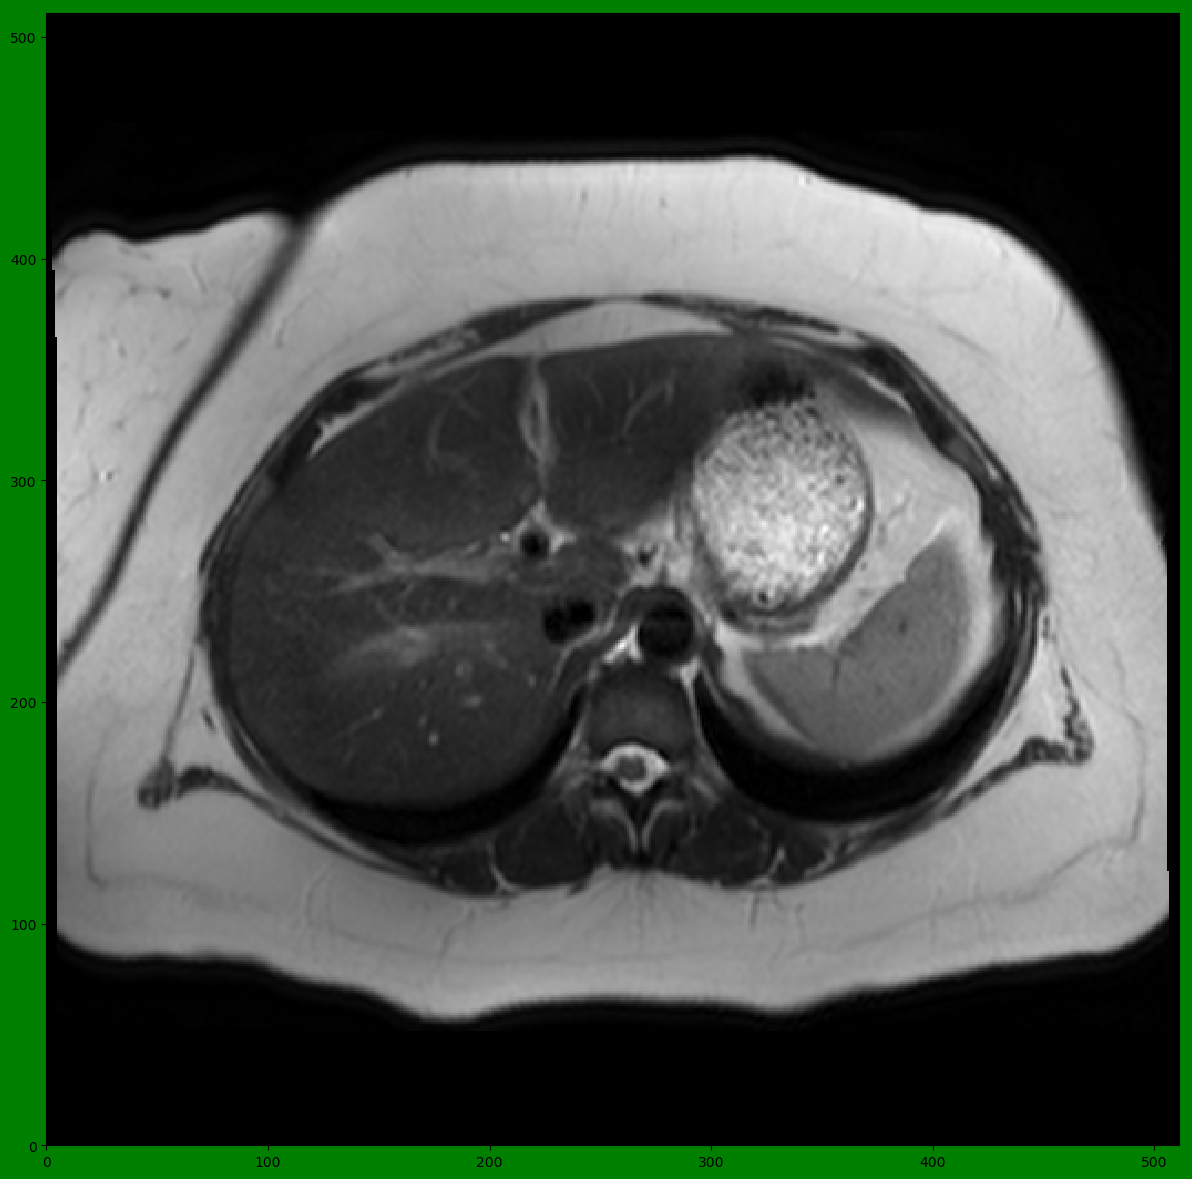

In [5]:
FirstFile = 'im140.dcm'
ImageAttributes(FirstFile)
print '-----------------------------------------Second File ------------------------------'
SecondFile = 'IM_0028.dcm'
ImageAttributes(SecondFile)